# Part I - (Prosper Loan Exploration)
## by (Rebecca Oyetunji)

## Introduction
> Prosper is an investment that is into loans, gathering investors and lending to people. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.



## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#load dataset into pandas dataframe
Loan_data = pd.read_csv('prosperloandata.csv')

In [3]:
# high-level overview of data shape and composition
print(Loan_data.shape)
print(Loan_data.dtypes)
print(Loan_data.head(10))

(113937, 81)
ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                  int64
InvestmentFromFriendsCount       int64
InvestmentFromFriendsAmount    float64
Investors                        int64
Length: 81, dtype: object
                ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   
5  0F05359734824199381F61D        1074836  2013-12-14 08:26:37.093000000   


In [4]:
Loan_data.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


### What is the structure of your dataset?

> There are 113,937 loan listings with 81 features to explain the attributes of each unique type of loans, borrower, lender and the associated rates. Most of the variables relevant to this exploration are numeric except for loan status(Cancelled, Chargedoff, Completed, PastDue)

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in features that can predict the loan's outcome status.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I suspect the borrowers range of salary, job, employment status and interest rate would help predict the loan status

## Univariate Exploration

> In this section, I'll start by looking at the distribution of the main variable of interest: loan status

## What is the variable distribution of the target variable - Loan Status

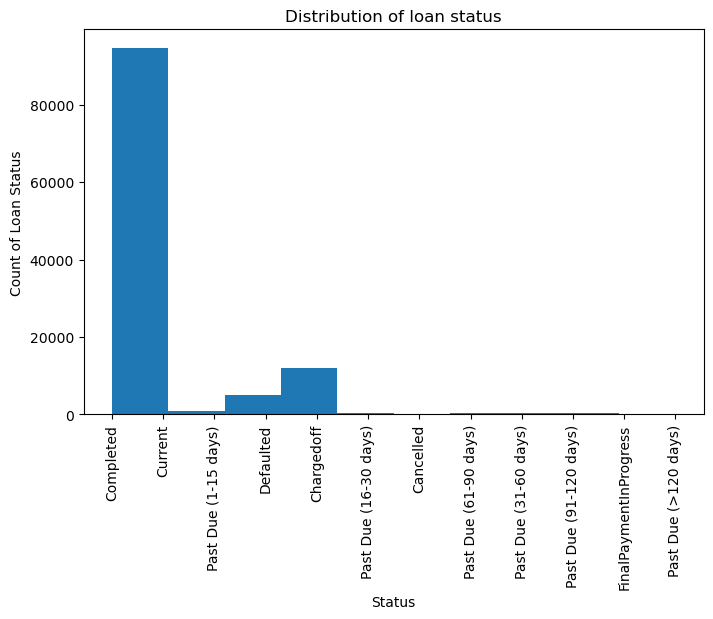

In [5]:
#using an histogram plot to see distribution or count of status
plt.figure(figsize=[8, 5])
plt.hist(data = Loan_data, x = 'LoanStatus')
plt.title('Distribution of loan status')
plt.xlabel('Status')
plt.ylabel('Count of Loan Status')
plt.xticks(rotation=90)
plt.show()

 -The above visualization does not give a clear representation of the distribution hence, the need to set a proportion.

In [6]:
Loan_counts = Loan_data['LoanStatus'].value_counts()
Loan_order = Loan_counts.index

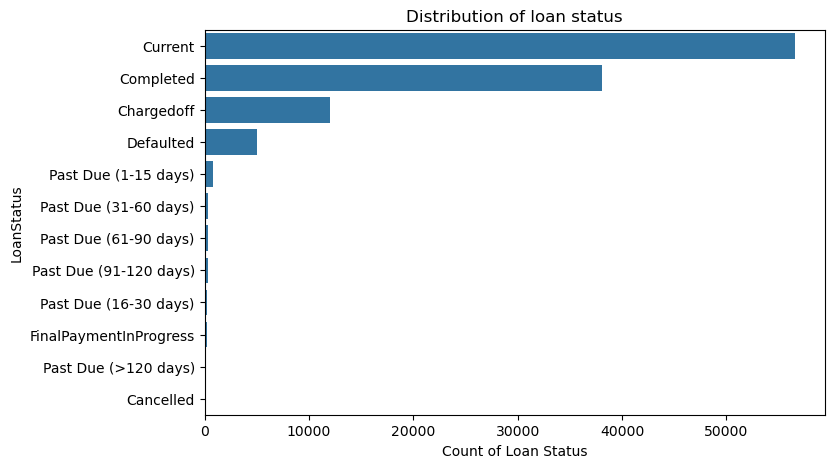

In [8]:
# start with a standard-scaled plot
#To use a horizontal bar chart with the right order
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = Loan_data, y = 'LoanStatus', color = base_color, order = Loan_order);
plt.title('Distribution of loan status')
plt.xlabel("Count of Loan Status");

In [9]:
#To move from absolute to relative frequency
n_loan = Loan_data['LoanStatus'].value_counts().sum()
max_Loan_count = Loan_counts[0]
max_prop = max_Loan_count/n_loan
tick_props = np.arange(0, max_prop,0.02)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

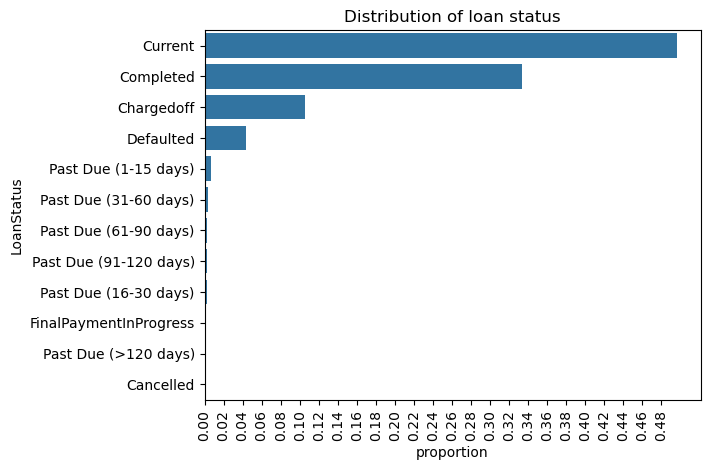

In [10]:
#Plotting
sb.countplot(data = Loan_data, y = 'LoanStatus', color=base_color, order = Loan_order);
plt.xticks(tick_props*n_loan,tick_names, rotation =90)
plt.title('Distribution of loan status')
plt.xlabel('proportion');

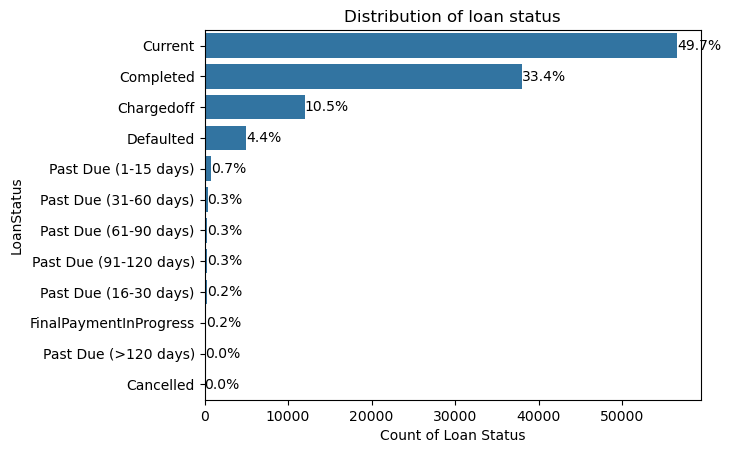

In [11]:
#Adding percentage as a form of relative frequency
sb.countplot(data = Loan_data, y = 'LoanStatus', color=base_color, order = Loan_order);
plt.xlabel("Count of Loan Status");
plt.title('Distribution of loan status')

for i in range(Loan_counts.shape[0]):
    count = Loan_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_loan)
    plt.text(count+1,i,pct_string,va = 'center');

> This gives us a detailed stage of each loan status compared to the former

In [12]:
#getting a proper description of the occupation of borrowers
b_order = Loan_data['Occupation'].value_counts().index

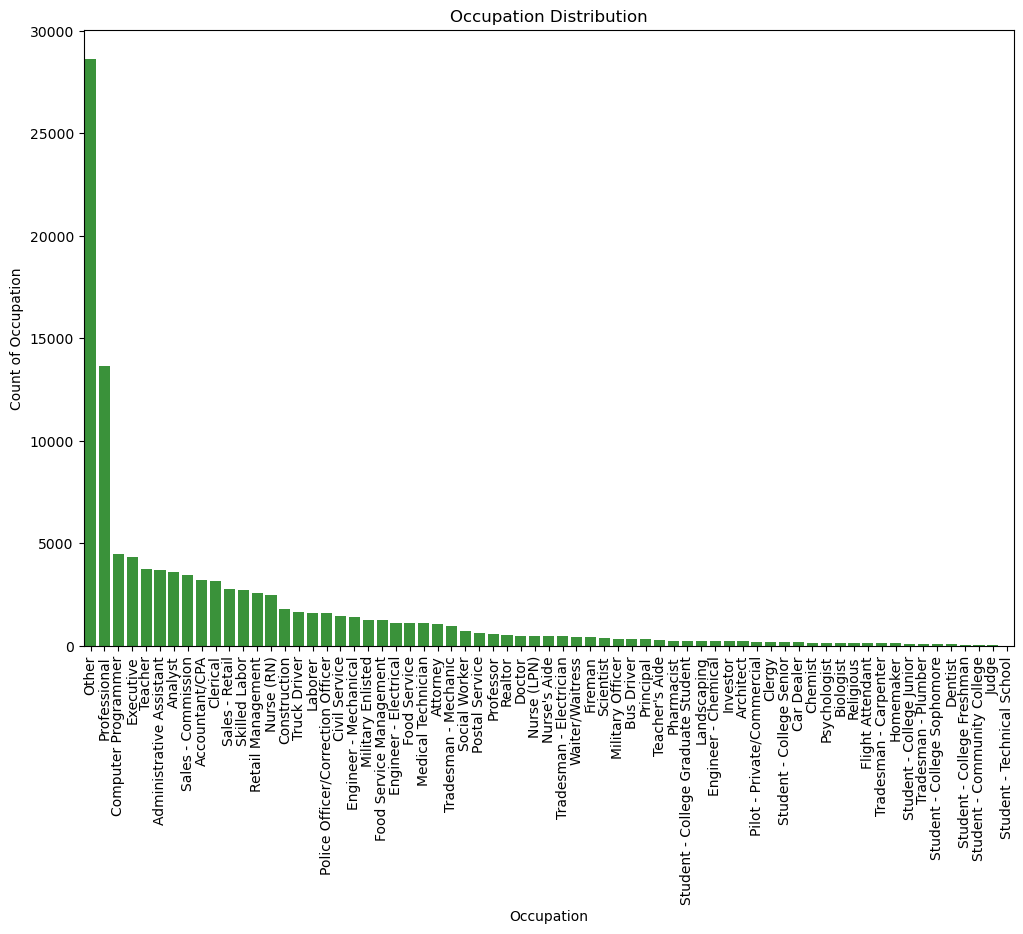

In [14]:
plt.figure(figsize=[12, 8])
colour = sb.color_palette()[2]
sb.countplot(data = Loan_data, x = 'Occupation', color = colour, order = b_order)
plt.xlabel('Occupation')
plt.ylabel("Count of Occupation")
plt.title ("Occupation Distribution")
plt.xticks(rotation =90)
plt.show();
 

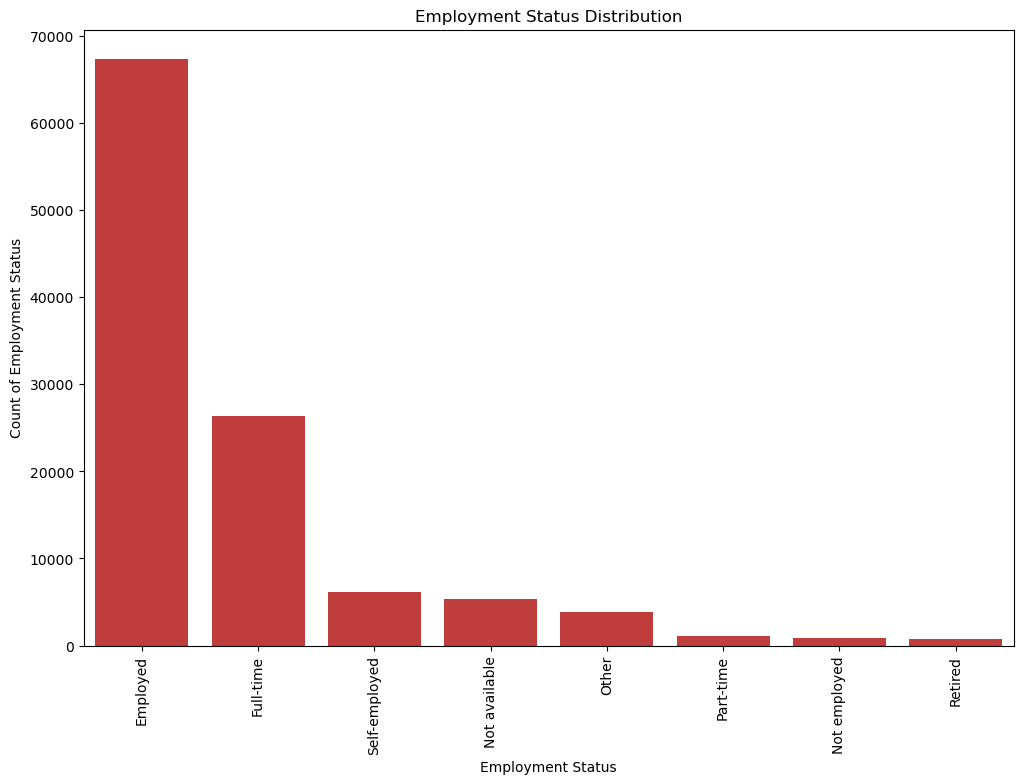

In [15]:
e_order = Loan_data['EmploymentStatus'].value_counts().index
plt.figure(figsize=[12, 8])
colour = sb.color_palette()[3]
sb.countplot(data = Loan_data, x = 'EmploymentStatus', color = colour, order = e_order)
plt.xlabel('Employment Status')
plt.ylabel("Count of Employment Status")
plt.title("Employment Status Distribution")
plt.xticks(rotation =90)
plt.show();


Those with occupation titled "others" in the occupation feature consists of not available,other,not employed and retired employment status

In [17]:
#getting a proper description of the income range
Range_order = Loan_data['IncomeRange'].value_counts().index

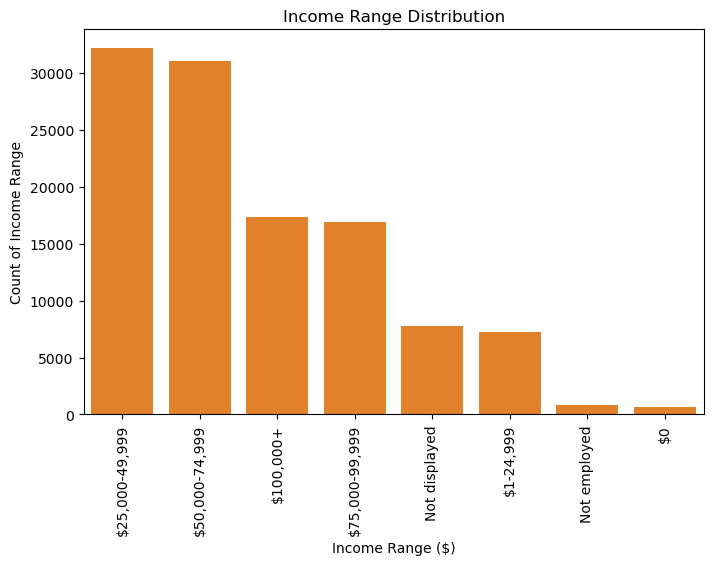

In [18]:
plt.figure(figsize=[8, 5])
colour = sb.color_palette()[1]
sb.countplot(data = Loan_data, x = 'IncomeRange', color = colour, order = Range_order)
plt.xlabel('Income Range ($)')
plt.ylabel('Count of Income Range')
plt.title ( "Income Range Distribution")
plt.xticks(rotation =90)
plt.show();


This shows that most people on loans earn between $25000 - $49,999 dollars

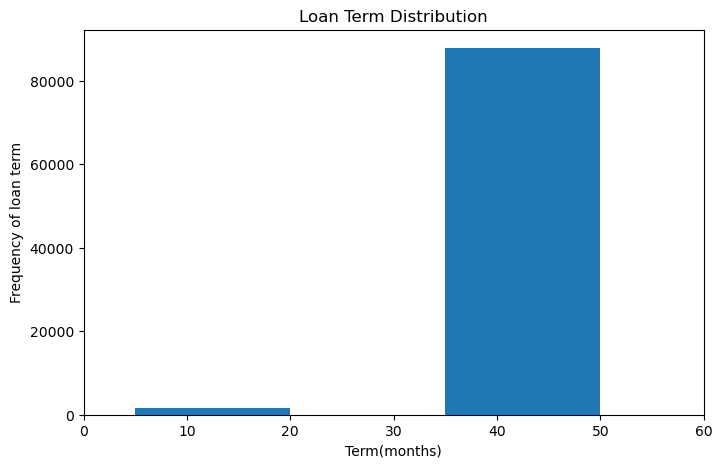

In [19]:
# plotting term on a standard scale
binsize = 15
bins = np.arange(5,60,15)
plt.figure(figsize=[8, 5])
plt.hist(data = Loan_data, x = 'Term', bins = bins)
plt.xlim([0,60])
plt.xlabel('Term(months)')
plt.ylabel('Frequency of loan term')
plt.title("Loan Term Distribution")
plt.show();

This shows that most of the loan as a term of up to 3 years and more which is a wide time to enable loan repayment

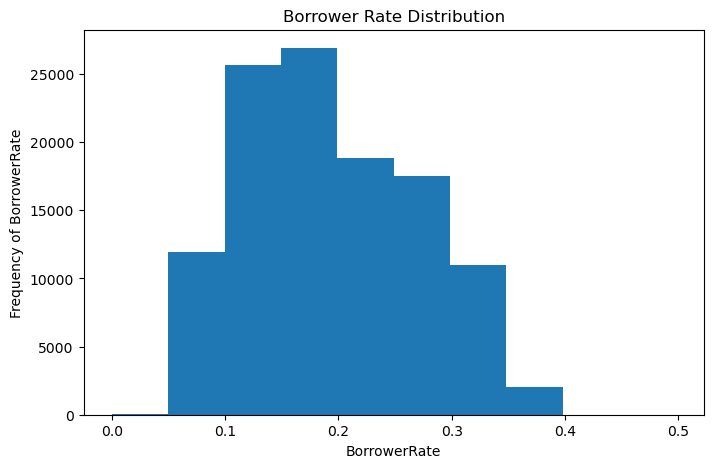

In [20]:
# plotting term on a standard scale
plt.figure(figsize=[8, 5])
plt.hist(data = Loan_data, x = 'BorrowerRate')
plt.xlabel('BorrowerRate')
plt.ylabel('Frequency of BorrowerRate')
plt.title ("Borrower Rate Distribution")
plt.show()

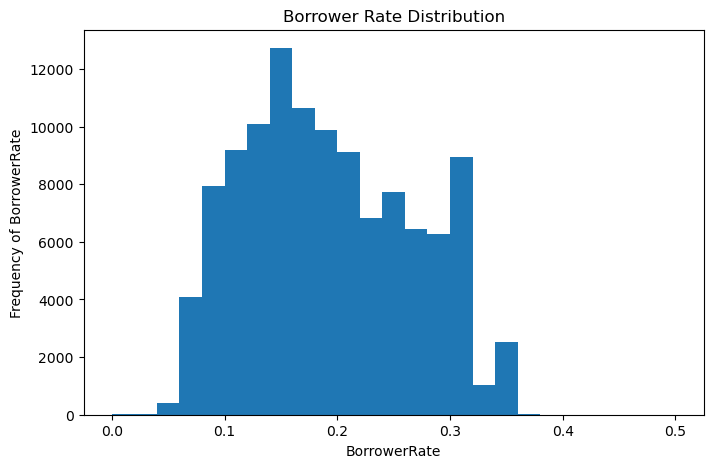

In [21]:
#Adjusting the binsize for a clearer visual
binsize = np.arange(0,0.5+0.02,0.02)
plt.figure(figsize=[8, 5])
plt.hist(data = Loan_data, x = 'BorrowerRate', bins = binsize)
plt.xlabel('BorrowerRate')
plt.ylabel('Frequency of BorrowerRate')
plt.title("Borrower Rate Distribution")
plt.show()

Most interests are between 0.05 and 0.35 of the amount loaned.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The loan status is the variable of interest and it appears some of the status were insignificant hence the need to use a horizontal bar chart. It then required to show the percentage as markers in order to intreprete clearly.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were unusual distribution in the dataset hence the need to order most of the data used for this analysis. It also required that a proper bin size and x axis limit be set in performing the operation.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

The plots between Income range and borrower rate shows that most loans  with lower interest rates have more borrowers,also most of the completed loans have lower rates. 

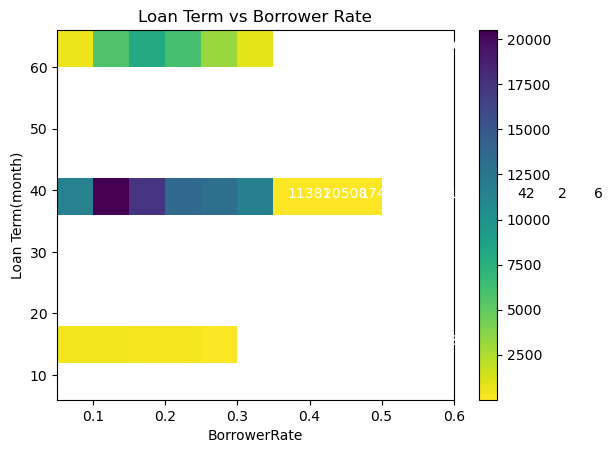

In [23]:
#Add text annotations above
# Specify bin edges 
bins_x = np.arange(0.05, 0.6+0.05, 0.05)
bins_y = np.arange(6, 60+10, 6)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = Loan_data, x = 'BorrowerRate', y = 'Term', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.title('Loan Term vs Borrower Rate')
plt.xlabel('BorrowerRate')
plt.ylabel('Loan Term(month)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.35, bins_y[j]+3.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

There isn't much correlations between Borrower rate and loan term. Lower interest rates is highly associated with loan terms to be paid within 3 years.

Text(0.5, 1.0, 'Borrower Rate vs Loan Status')

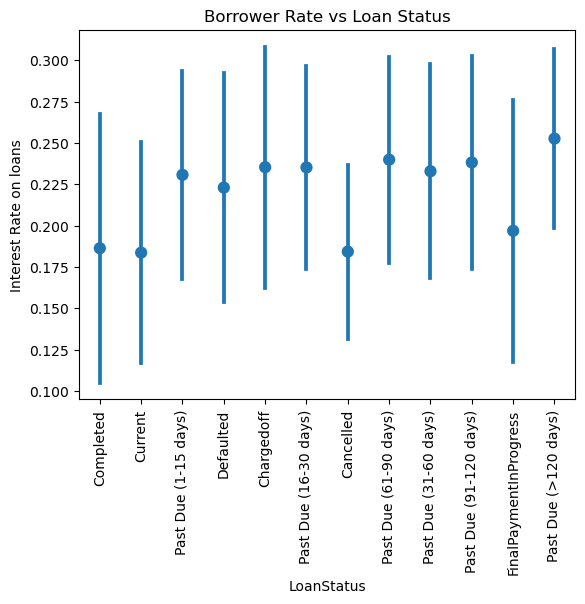

In [24]:
#Using pointplot to compare interest and status
sb.pointplot(data=Loan_data, x='LoanStatus', y='BorrowerRate', color=base_color, ci='sd', linestyles="")
plt.xticks(rotation=90);
plt.ylabel('Interest Rate on loans')
plt.title('Borrower Rate vs Loan Status')

The plots between Loan Status and borrower rate shows that  lower interest rates have more completed loans.

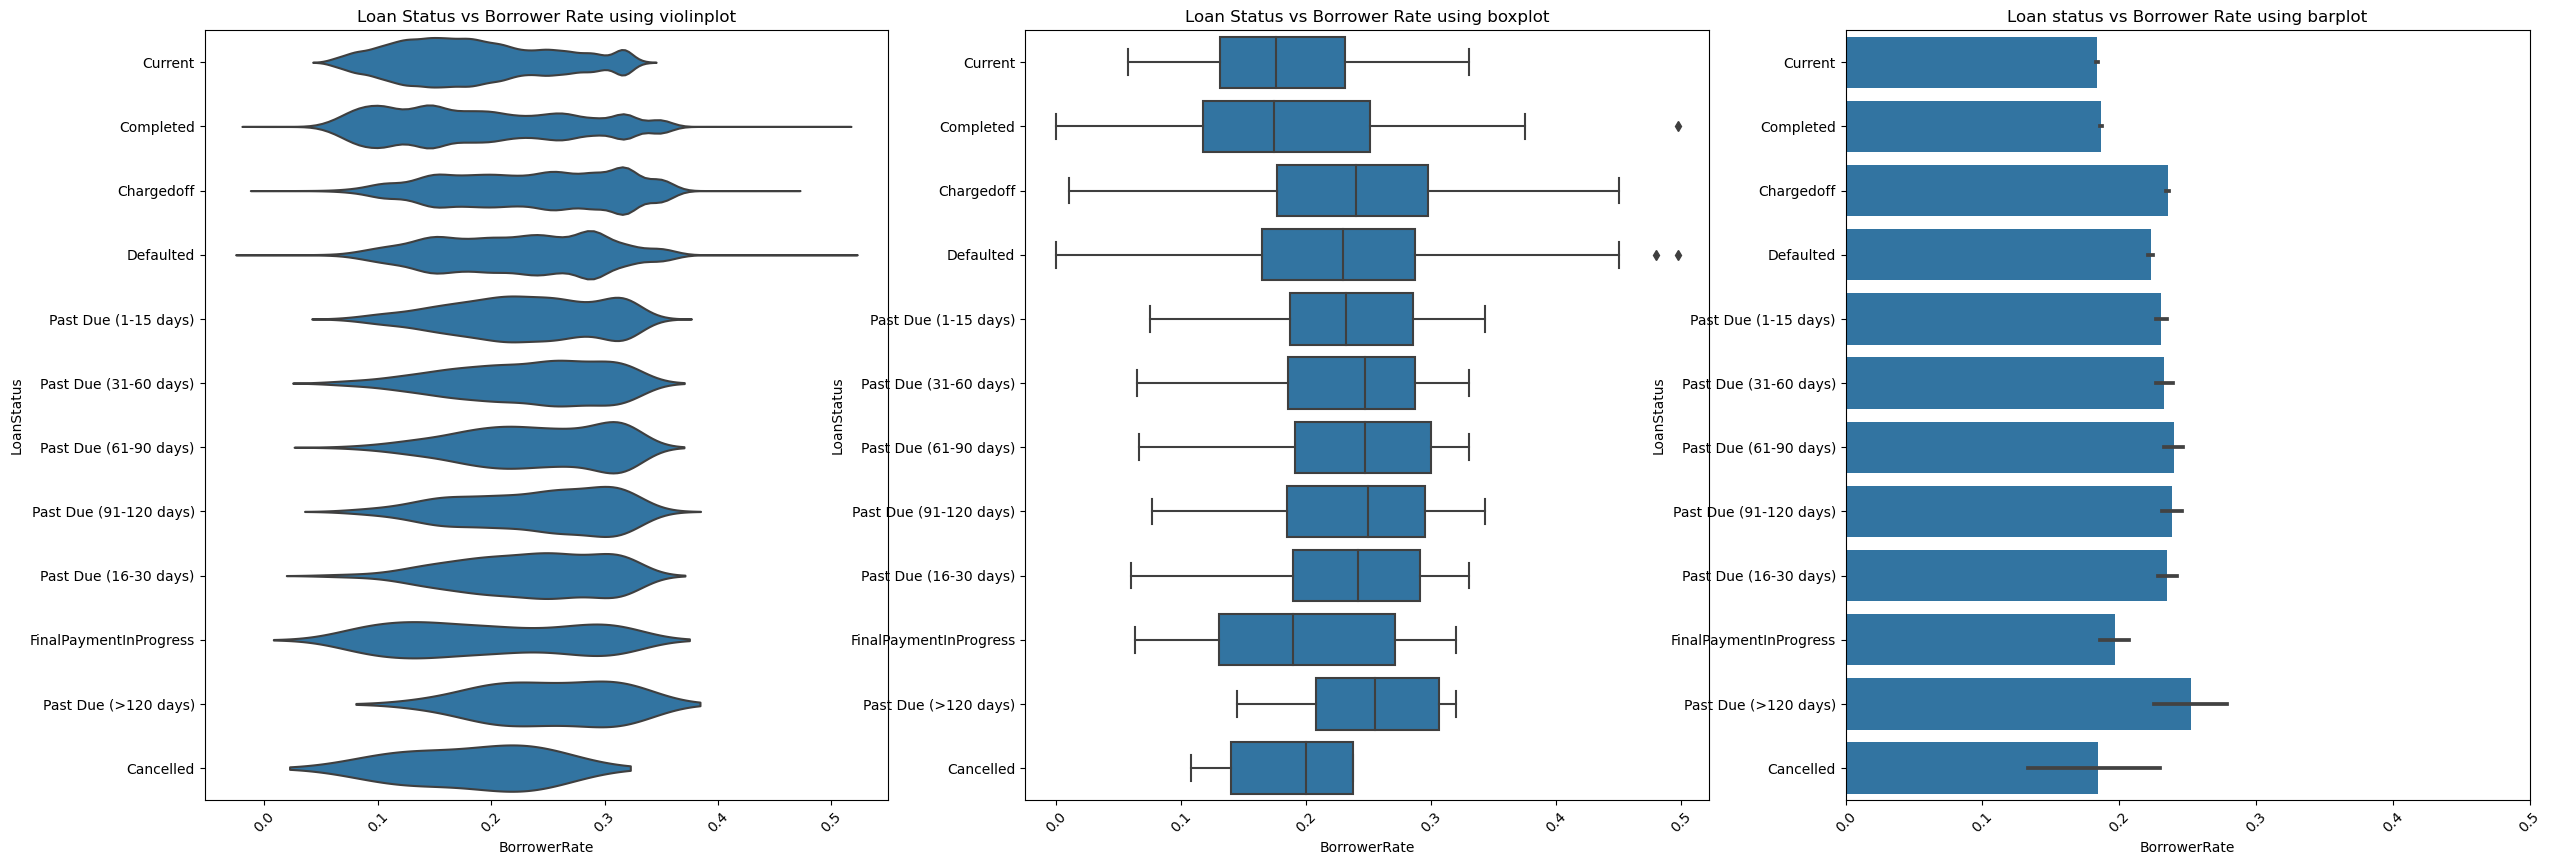

In [25]:
# Bringing a few charts together
plt.figure(figsize = [30, 10])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data=Loan_data, x='BorrowerRate', y='LoanStatus', inner = None,
              color = base_color, order = Loan_order)
plt.title('Loan Status vs Borrower Rate using violinplot')
plt.xticks(rotation = 45); # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=Loan_data, x='BorrowerRate', y='LoanStatus', color = base_color, order = Loan_order)
plt.title('Loan Status vs Borrower Rate using boxplot')
plt.xticks(rotation = 45);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
bin_x = np.arange(0.00,0.4+0.1,0.1)
sb.barplot(data=Loan_data, x='BorrowerRate', y='LoanStatus', color = base_color, order = Loan_order)
plt.xlim([0,0.5])
plt.title('Loan status vs Borrower Rate using barplot')
plt.xticks(rotation = 45);

The relationship of borrower rate and loan status was further confirmed with this plot.

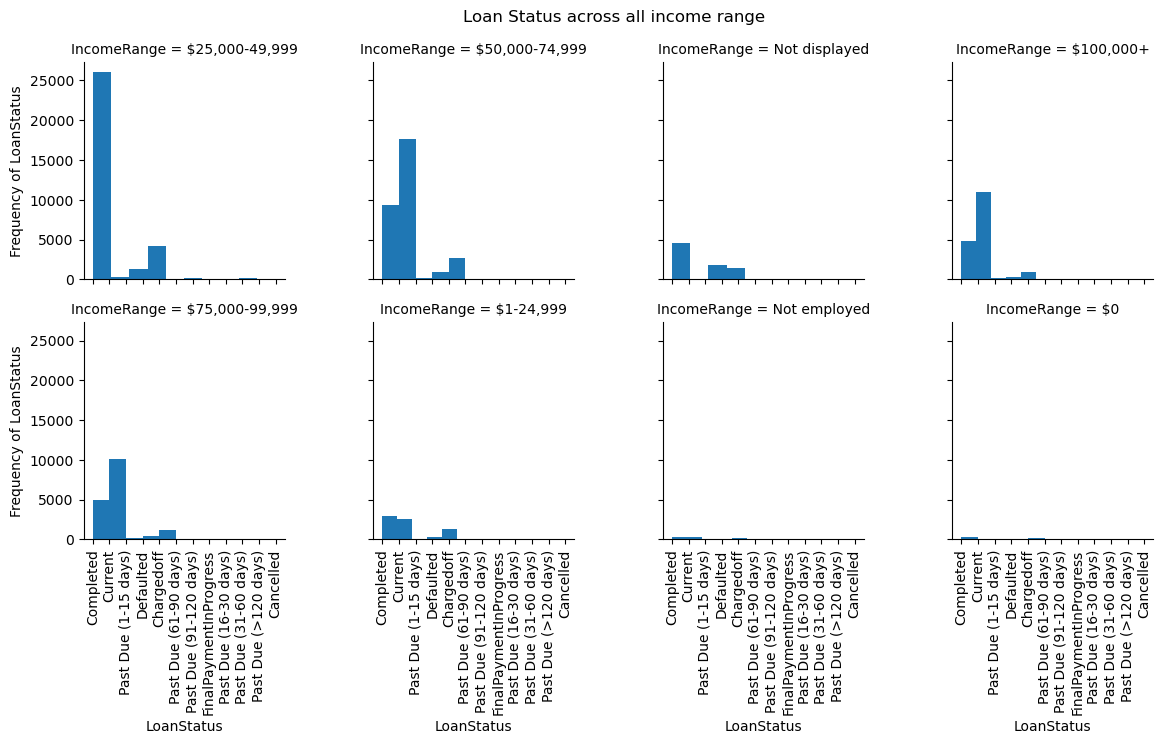

In [38]:
# the argument col_wrap is used to display the FacetGrid in the desirable sequence
g = sb.FacetGrid(data = Loan_data, col = 'IncomeRange',col_wrap = 4)
g.fig.suptitle('Loan Status across all income range')
g = g.map(plt.hist, "LoanStatus")
g.set_ylabels('Frequency of LoanStatus')
g.set_xticklabels(rotation =90)
plt.show()

The income range is plotted from the most significant (25000-49,999 dollars) to the least significant. Showing that the former has the highest loan frequency i.e there are more people in that income range that are borrowers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There exist relationships across terms like income range, borrower rate and Loan Status.
An increase in income improves the loan status from cancelled or past due to completed. Completed and current loan status are associated with loans of lower interest rates 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The relationship between loan term and borrower rate is not explicable however, the income range and borrower rate plots show that more people with higher source of income tend to borrow more.

## Multivariate Exploration

> Here, we further investigate the relationships between variables using bar chart and scatter plots in order to arrive at the purposed observation.

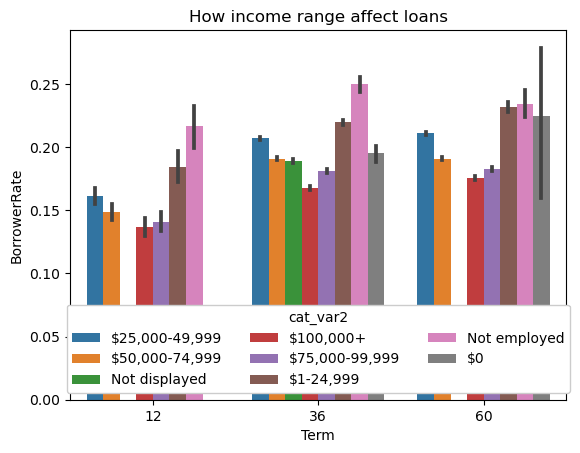

In [30]:
#Clustered bar (multivariate)
ax = sb.barplot(data = Loan_data, x = 'Term', y = 'BorrowerRate', hue = 'IncomeRange')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'cat_var2')
ax.set_title('How income range affect loans');

This use different colors to represent income range , there are more people in the 36 months term range (including those whose salary is not displayed and those with no income) than in the other loan term

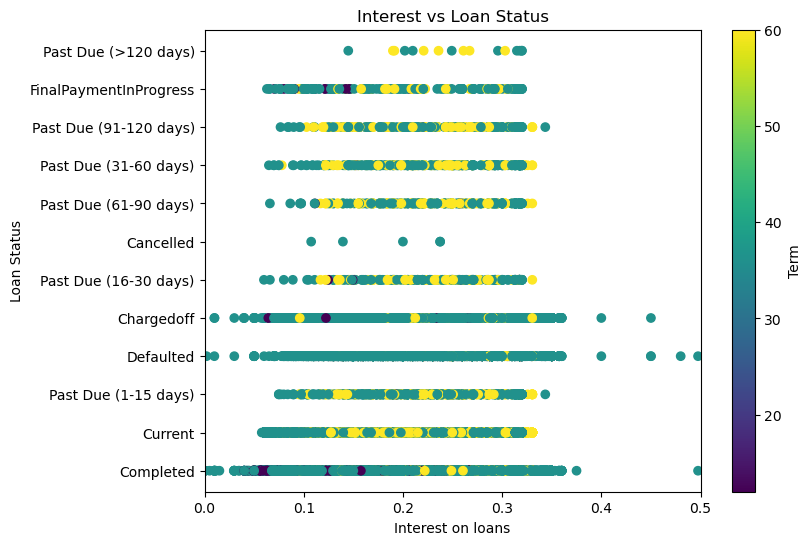

In [32]:
# plotting using scatter chart
plt.figure(figsize = [8,6])
plt.scatter(data = Loan_data, x = 'BorrowerRate', y = 'LoanStatus',c = 'Term')
plt.colorbar(label = 'Term')
plt.title('Interest vs Loan Status')
plt.xlim(0,0.5)
plt.xlabel('Interest on loans')
plt.ylabel('Loan Status');

C:\Users\Snapnet User\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


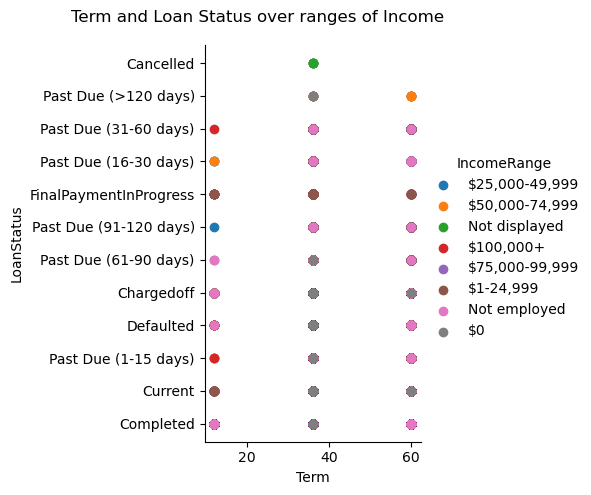

In [36]:
#Further comparisons with Facet grid
g = sb.FacetGrid(data = Loan_data, hue = 'IncomeRange', size = 5)
g.fig.suptitle('Term and Loan Status over ranges of Income')
g.map(plt.scatter, 'Term','LoanStatus')
g.add_legend();

This further confirms the first multivariate plot

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The scatter plot shows that most loan terms were between 36 to 50 months i.e 3 to 4 years. The bar plot and the facet grid scatter plot were both aligned in been able to identify that most people with 0 income chose loans with longer terms in years.

### Were there any interesting or surprising interactions between features?

> The last scatter plot has an interesting interaction as it did not diverge or converge like most scatter plots but were sort of defined based on the loan terms.

## Conclusions
>
This exploration has been able to help us in determining how loan status can be affected by income range, interest rate, loan terms and occupation. 
It started with the univariate plots which helped to better understand the details of each variable of interest. This helped to determine what type of plots they'd be best used for in bivariate and multivariate expressions.
The bivariate plots helped to see the relationships between the variables of interest and their contributions to the target variable
The multivariate plots helped to further prove these relationships.

>Limitations

There were some plots that despite applying xticks the xlabels can not be easily read due to the fact that they are in series with other plots.

The facet grid plots and some other subplots could not contain axis label.